In [1]:
import openai
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from openai.embeddings_utils import cosine_similarity
from openai.embeddings_utils import get_embedding
from sklearn.manifold import TSNE

In [8]:
df = pd.read_csv("EPiC_Database_2019.csv", names = ['Category', 'Material', 'Functional unit', 'Embodied Energy (MJ)', 'Embodied Water (L)', 'Embodied Greenhouse Gas Emissions (kgCO₂e)', 'More information'], skiprows= 1)
df.head(10) 


,Category,Material,Functional unit,Embodied Energy (MJ),Embodied Water (L),Embodied Greenhouse Gas Emissions (kgCO₂e),More information
0,Concrete and plaster products,Concrete block,kg,2.6,3.7,0.24,http://doi.org/10.26188/5da552ea39cdc
1,Concrete and plaster products,Concrete block - 390 × 190 × 90 mm,no.,24.3,34.2,2.2,http://doi.org/10.26188/5da552ea39cdc
2,Concrete and plaster products,Concrete block - 390 × 190 × 140 mm,no.,29.6,41.6,2.7,http://doi.org/10.26188/5da552ea39cdc
3,Concrete and plaster products,Concrete block - 390 × 190 × 190 mm,no.,35.2,49.4,3.2,http://doi.org/10.26188/5da552ea39cdc
4,Concrete and plaster products,Cement mortar,kg,3.9,3.7,0.35,http://doi.org/10.26188/5da5528f75432
5,Concrete and plaster products,Portland cement,kg,11.8,7.8,1.3,http://doi.org/10.26188/5da55701cee5d
6,Concrete and plaster products,Autoclaved aerated concrete (AAC),kg,8.5,8.4,0.71,http://doi.org/10.26188/5da551fc254d7
7,Concrete and plaster products,AAC block - 600 × 200 × 100 mm,no.,56.4,55.4,4.7,http://doi.org/10.26188/5da551fc254d7
8,Concrete and plaster products,AAC block - 600 × 200 × 150 mm,no.,84.5,83,7,http://doi.org/10.26188/5da551fc254d7
9,Concrete and plaster products,AAC block - 600 × 200 × 200 mm,no.,113,111,9.4,http://doi.org/10.26188/5da551fc254d7


In [6]:
# from openai.embeddings_utils import get_embedding

# test_df['embeddings'] = test_df['Material'].apply(lambda x: get_embedding(x, engine="text-embedding-ada-002"))
# test_df.to_csv('word_embeddings.csv')

In [1]:
# df_em = pd.read_csv('word_embeddings.csv')
# df_em['embeddings'] = df_em['embeddings'].apply(eval).apply(np.array)
# df_em

In [8]:
import pandas as pd
import numpy as np

# Load the embeddings
pddf = pd.read_csv('word_embeddings.csv')

# Convert to a list of lists of floats
matrix = np.array(pddf.embeddings.apply(eval).to_list())

# Create a t-SNE model and transform the data
tsne = TSNE(n_components=2, perplexity=15, random_state=42, init='random', learning_rate=200)
vis_dims = tsne.fit_transform(matrix)
vis_dims.shape

(53, 2)

In [9]:
# import matplotlib.pyplot as plt
# import matplotlib
# import numpy as np

# colors = ["red", "darkorange", "gold", "turquoise", "darkgreen"]
# x = [x for x,y in vis_dims]
# y = [y for x,y in vis_dims]
# color_indices = pddf.Material.values - 1

# colormap = matplotlib.colors.ListedColormap(colors)
# plt.scatter(x, y, c=color_indices, cmap=colormap, alpha=0.3)
# for score in [0,1,2,3,4]:
#     avg_x = np.array(x)[pddf.Material-1==score].mean()
#     avg_y = np.array(y)[pddf.Material-1==score].mean()
#     color = colors[score]
#     plt.scatter(avg_x, avg_y, marker='x', color=color, s=100)

# plt.title("Amazon ratings visualized in language using t-SNE")

In [10]:
# search_term = input('Enter a search term: ')

In [3]:
# search_term_vector = get_embedding(search_term, engine='text-embedding-ada-002')
# search_term_vector

In [4]:
# from openai.embeddings_utils import cosine_similarity
# df_em['similarities'] = df_em['embeddings'].apply(lambda x: cosine_similarity(x, search_term_vector))
# df_em.sort_values("similarities", ascending=False).head(20)

In [13]:
# from openai.embeddings_utils import get_embedding

# df['embeddings'] = df['Material'].apply(lambda x: get_embedding(x, engine="text-embedding-ada-002"))
# df.to_csv('word_embeddings_EPiC.csv')

In [13]:
df_3d = pd.read_csv('word_embeddings_EPiC.csv')

In [4]:
df_epic = pd.read_csv('word_embeddings_EPiC.csv')
df_epic['embeddings'] = df_epic['embeddings'].apply(eval).apply(np.array)
df_epic

,Unnamed: 0,Category,Material,Functional unit,Embodied Energy (MJ),Embodied Water (L),Embodied Greenhouse Gas Emissions (kgCO₂e),More information,embeddings
0,0,Concrete and plaster products,Concrete block,kg,2.6,3.7,0.24,http://doi.org/10.26188/5da552ea39cdc,"[-0.02005346491932869, -0.0024382583796977997,..."
1,1,Concrete and plaster products,Concrete block - 390 × 190 × 90 mm,no.,24.3,34.2,2.2,http://doi.org/10.26188/5da552ea39cdc,"[-0.005028039216995239, 0.006394283380359411, ..."
2,2,Concrete and plaster products,Concrete block - 390 × 190 × 140 mm,no.,29.6,41.6,2.7,http://doi.org/10.26188/5da552ea39cdc,"[-0.00465925969183445, 0.008461344987154007, -..."
3,3,Concrete and plaster products,Concrete block - 390 × 190 × 190 mm,no.,35.2,49.4,3.2,http://doi.org/10.26188/5da552ea39cdc,"[-0.0043403590098023415, 0.008137354627251625,..."
4,4,Concrete and plaster products,Cement mortar,kg,3.9,3.7,0.35,http://doi.org/10.26188/5da5528f75432,"[-0.012803852558135986, 0.014618215151131153, ..."
...,...,...,...,...,...,...,...,...,...
279,279,Timber products,Structural insulated panel (SIP),m²,2 624,4 219,135,http://doi.org/10.26188/5da5586fec593,"[-0.009794671088457108, 0.009694453328847885, ..."
280,280,Timber products,SIP - 142 mm,m²,3 327,5 349,171,http://doi.org/10.26188/5da5586fec593,"[0.00539021659642458, 0.01879829913377762, -0...."
281,281,Timber products,SIP - 162 mm,m²,3 795,6 103,195,http://doi.org/10.26188/5da5586fec593,"[0.0035224827006459236, 0.023833518847823143, ..."
282,282,Timber products,Softwood,m³,9 392,13 091,549,http://doi.org/10.26188/5da5578416cc9,"[0.003608147846534848, -0.011392055079340935, ..."


In [25]:
search_term_epic = input('Enter a search term: ')

In [10]:
search_term_epic = input('Enter a search term: ')
search_term_vector_epic = get_embedding(search_term_epic, engine='text-embedding-ada-002')
df_epic['similarities'] = df_epic['embeddings'].apply(lambda x: cosine_similarity(x, search_term_vector_epic))
df_epic.sort_values("similarities", ascending=False).head()

# sort_df = df_epic.sort_values("similarities", ascending=False)
# sort_df[['Material','Category','similarities']].head(10)

,Unnamed: 0,Category,Material,Functional unit,Embodied Energy (MJ),Embodied Water (L),Embodied Greenhouse Gas Emissions (kgCO₂e),More information,embeddings,similarities
22,22,Concrete and plaster products,Concrete 50 MPa,m³,3 998,4 365,600,http://doi.org/10.26188/5da5514c0eea5,"[0.0003159770858474076, 0.0004473714216146618,...",0.881545
19,19,Concrete and plaster products,Concrete 40 MPa,m³,3 476,4 355,497,http://doi.org/10.26188/5da5507e33fe6,"[0.001810640562325716, 0.0036380928941071033, ...",0.877737
10,10,Concrete and plaster products,Concrete 20 MPa,m³,2 404,4 154,328,http://doi.org/10.26188/5da54a205d0e5,"[0.0015791815239936113, 0.005774808581918478, ...",0.872182
16,16,Concrete and plaster products,Concrete 32 MPa,m³,3 015,4 300,416,http://doi.org/10.26188/5da550538b369,"[0.013591989874839783, 0.007851066067814827, -...",0.871437
13,13,Concrete and plaster products,Concrete 25 MPa,m³,2 581,4 196,361,http://doi.org/10.26188/5da54a4ae57a1,"[-0.008547145873308182, 0.0053861006163060665,...",0.869617


In [17]:
highest_similarity = df_epic['similarities'].max()

In [18]:
if highest_similarity >= 0.9:
    fact_with_highest_similarity = df_epic.loc[df_epic['similarities'] == highest_similarity, 'Material']
    print(fact_with_highest_similarity)
else:
    response = openai.Completion.create(
      model = 'text-davinci-003',
      prompt = search_term_epic,
      max_tokens = 30,
      temperature = 0
    )
    content = response['choices'][0]['text'].replace('\n', '')
    print(content)


Insulation is a material or combination of materials used to reduce the transmission of heat, sound, or electricity. It is used in a variety


In [19]:
def search_materials(df_epic, material_description, n=5, pprint=True):
    material_embedding = get_embedding(
        material_description,
        engine="text-embedding-ada-002"
    )
    df_epic["similarities"] = df_epic.embeddings.apply(lambda x: cosine_similarity(x, material_embedding))

    results = (
        df_epic.sort_values("similarities", ascending=False)
        .head(n)
        .loc[:, "Material"] #<--- how to get two columns and return everything
    )
    if pprint:
        for r in results:
            print(r)
            print()
    return results

In [24]:
results = search_materials(df_epic, "Metal - Copper", n=3)

Copper wire

Copper sheet

Copper pipe



In [21]:
results = search_materials(df_epic, "Timber Lining (Cox)", n=5)

Cross laminated timber (CLT)

Glued laminated timber (glulam)

Fibre cement weatherboard

Softwood

Hardwood



In [22]:
results = search_materials(df_epic, "Concrete - Cast In Situ", n=5)

Concrete 32 MPa

Concrete 40 MPa

Concrete 25 MPa

Concrete block

Concrete 25 MPa - 30% fly ash



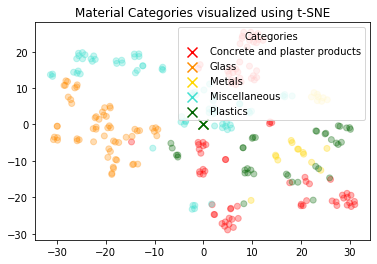

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Load the embeddings
df_epic_em = pd.read_csv('word_embeddings_EPiC.csv')

# Convert to a list of lists of floats
matrix = np.array(df_epic_em.embeddings.apply(eval).to_list())

# Create a t-SNE model and transform the data
tsne = TSNE(n_components=2, perplexity=15, random_state=42, init='random', learning_rate=200)
vis_dims = tsne.fit_transform(matrix)

# Define the categories and their respective colors
categories = df_epic_em['Category'].unique()
colors = ["red", "darkorange", "gold", "turquoise", "darkgreen"]

# Extract the x and y coordinates from the t-SNE result
x = [coord[0] for coord in vis_dims]
y = [coord[1] for coord in vis_dims]

# Get the color indices for each point
color_indices = df_epic_em.Category.astype('category').cat.codes

# Create a colormap based on the categories and colors
colormap = mcolors.ListedColormap(colors)

# Scatter plot with category colors
plt.scatter(x, y, c=color_indices, cmap=colormap, alpha=0.3)

# Plot markers for each category
for score, color in enumerate(colors):
    avg_x = df_epic_em[df_epic_em.Category == categories[score]]['embeddings'].apply(eval).apply(lambda x: x[0]).mean()
    avg_y = df_epic_em[df_epic_em.Category == categories[score]]['embeddings'].apply(eval).apply(lambda x: x[1]).mean()
    plt.scatter(avg_x, avg_y, marker='x', color=color, s=100, label=categories[score])

# Add legend
plt.legend(title='Categories', loc='upper right')

plt.title("Material Categories visualized using t-SNE")
plt.show()

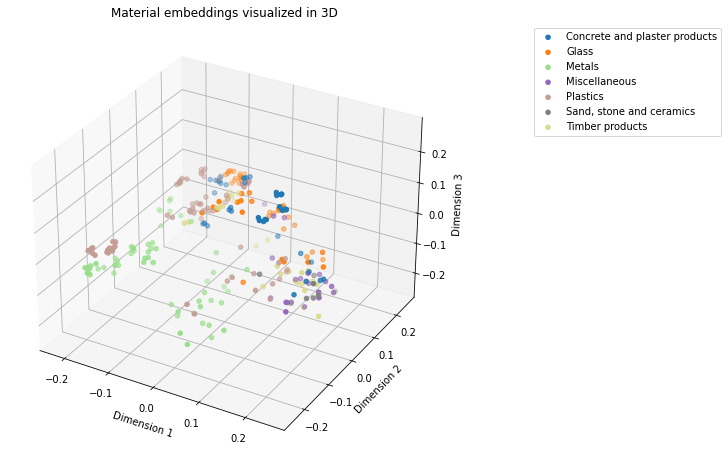

In [27]:
import pandas as pd
from openai.embeddings_utils import get_embeddings
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Load your material dataset
csv_path = "EPiC_Database_2019.csv"
material_data = pd.read_csv(csv_path)

# Query embeddings for your material data
text_data = material_data["Material"].tolist()
matrix = get_embeddings(text_data, engine="text-embedding-ada-002")

# Reduce the embedding dimensionality
pca = PCA(n_components=3)
vis_dims = pca.fit_transform(matrix)
material_data["embed_vis"] = vis_dims.tolist()

# Increase the figure size for a larger graph
fig = plt.figure(figsize=(12, 8))  # Adjust the figsize as needed
ax = fig.add_subplot(111, projection='3d')

cmap = plt.get_cmap("tab20")
unique_categories = material_data["Category"].unique()

# Plot each category individually
for i, category in enumerate(unique_categories):
    sub_matrix = np.array(material_data[material_data["Category"] == category]["embed_vis"].to_list())
    x = sub_matrix[:, 0]
    y = sub_matrix[:, 1]
    z = sub_matrix[:, 2]
    colors = [cmap(i / len(unique_categories))] * len(sub_matrix)
    ax.scatter(x, y, z, c=colors, label=category)

ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
ax.set_zlabel('Dimension 3')

# Move the legend outside the plot
ax.legend(loc='upper left', bbox_to_anchor=(1.2, 1))

plt.title("Material embeddings visualized in 3D")
plt.show()


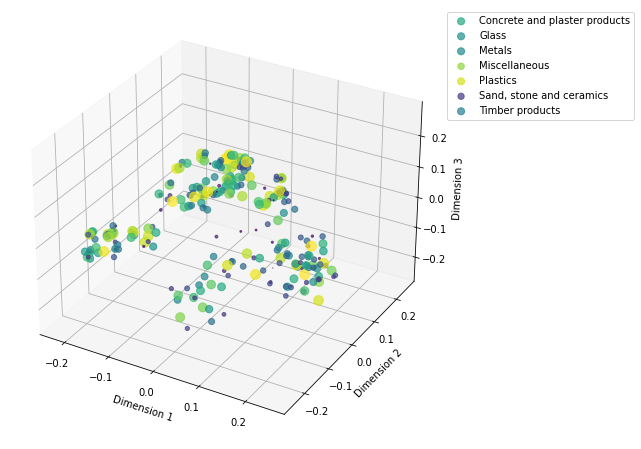

In [28]:
import pandas as pd
from openai.embeddings_utils import get_embeddings
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Load your material dataset
csv_path = "EPiC_Database_2019.csv"
material_data = pd.read_csv(csv_path)

# Query embeddings for your material data
text_data = material_data["Material"].tolist()
matrix = get_embeddings(text_data, engine="text-embedding-ada-002")

# Reduce the embedding dimensionality
pca = PCA(n_components=3)
vis_dims = pca.fit_transform(matrix)
material_data["embed_vis"] = vis_dims.tolist()

# Add a random 4th dimension for demonstration
material_data["fourth_dimension"] = np.random.rand(len(material_data))

# Increase the figure size for a larger graph
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

cmap = plt.get_cmap("viridis")
unique_categories = material_data["Category"].unique()

# Plot each category individually
for i, category in enumerate(unique_categories):
    sub_data = material_data[material_data["Category"] == category]
    x = sub_data["embed_vis"].apply(lambda v: v[0])
    y = sub_data["embed_vis"].apply(lambda v: v[1])
    z = sub_data["embed_vis"].apply(lambda v: v[2])
    fourth_dim = sub_data["fourth_dimension"]

    colors = cmap(fourth_dim)  # Use color to represent the fourth dimension
    sizes = fourth_dim * 100  # Use size to represent the fourth dimension

    ax.scatter(x, y, z, c=colors, s=sizes, label=category, alpha=0.7)

ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
ax.set_zlabel('Dimension 3')

# Move the legend outside the plot
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.show()
